### 1. Importing libraries and data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Defining path
path = r'/Users/CK/Downloads/CF/Chapter6'

In [4]:
df = pd.read_csv(os.path.join(path,'02 Data' , 'House_Rent_Dataset.csv'), index_col = False)

In [5]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


## 2 Data Cleaning

In [6]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [7]:
df.head(20)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [8]:
df.shape

(4746, 12)

In [9]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [10]:
#Duplicate Check
dups = df.duplicated()

In [11]:
dups.shape # No dups

(4746,)

/var/folders/gc/2p45966n07l89n0z72465jy80000gn/T/ipykernel_53115/365166610.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rent'], bins=25) # Shows extreme values
/Users/CK/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rent', ylabel='Density'>

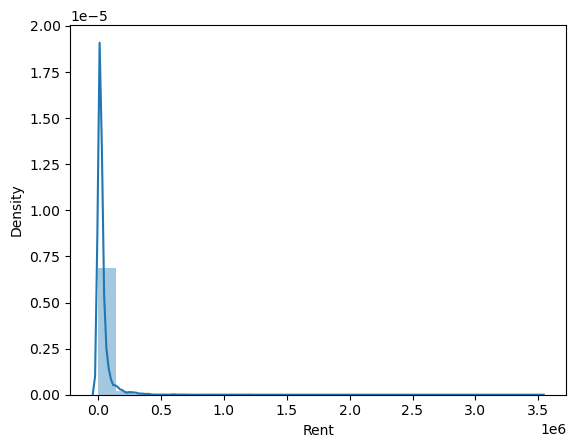

In [84]:
sns.distplot(df['Rent'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [81]:
df['Rent'].mean() # Check the mean

34993.45132743363

In [82]:
df['Rent'].median() # Check the median

16000.0

In [83]:
df['Rent'].max() # Check the max

3500000

### 3. Data prep for regression analysis 

I would like  to do the analysis filtering out only one city - Bangalore and then check for relationship between variables


In [41]:
df_bangalore_all = df.loc[df['City'] == 'Bangalore']


In [42]:
df_bangalore_all.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1496,2022-06-30,3,70000,3354,Ground out of 16,Carpet Area,Talagatta Pura,Bangalore,Furnished,Bachelors/Family,3,Contact Agent
1497,2022-06-23,2,10500,800,3 out of 4,Super Area,Nagappa Reddy layout-Dooravani Nagar,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
1498,2022-07-04,2,13000,1000,Ground out of 4,Super Area,"Kattigenahalli, Bellary Road",Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
1499,2022-06-04,2,17000,1040,4 out of 4,Super Area,C V Raman Nagar,Bangalore,Furnished,Bachelors/Family,2,Contact Owner
1500,2022-06-04,3,21000,1403,1 out of 4,Super Area,"Chikkalasandra, Bangalore",Bangalore,Semi-Furnished,Bachelors/Family,3,Contact Owner


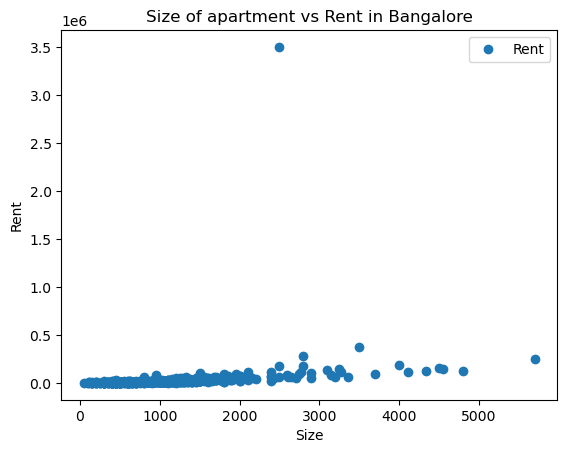

In [43]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_bangalore_all.plot(x = 'Size', y='Rent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Size of apartment vs Rent in Bangalore')  
plt.xlabel('Size')  
plt.ylabel('Rent')  
plt.show()

In [62]:
df_bangalore_all.shape

(886, 12)

In [85]:
# Clean the extreme values from the "Rent" variable observed during the consistency checks. 

df_bangalore = df_bangalore_all[df_bangalore_all['Rent']<60000] 

In [86]:
df_bangalore.shape

(837, 12)

In [87]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_bangalore['Size'].values.reshape(-1,1)
y = df_bangalore['Rent'].values.reshape(-1,1)

In [88]:
X


array([[ 800],
       [1000],
       [1040],
       [1403],
       [ 600],
       [ 850],
       [ 400],
       [1000],
       [1350],
       [ 800],
       [ 350],
       [ 900],
       [2000],
       [ 700],
       [ 600],
       [ 700],
       [ 600],
       [1400],
       [ 600],
       [ 770],
       [ 900],
       [ 500],
       [1100],
       [ 500],
       [1260],
       [1750],
       [ 600],
       [ 450],
       [ 800],
       [ 400],
       [ 600],
       [ 400],
       [ 900],
       [1200],
       [1045],
       [1021],
       [1200],
       [1000],
       [1280],
       [ 450],
       [ 450],
       [ 600],
       [ 800],
       [ 500],
       [1680],
       [ 500],
       [ 500],
       [ 800],
       [1100],
       [1200],
       [ 500],
       [1155],
       [ 440],
       [1040],
       [1200],
       [1600],
       [1000],
       [1200],
       [ 400],
       [ 950],
       [ 530],
       [ 300],
       [1000],
       [ 450],
       [ 600],
       [1100],
       [ 4

In [89]:
y

array([[10500],
       [13000],
       [17000],
       [21000],
       [10000],
       [13000],
       [ 7500],
       [17000],
       [25000],
       [10500],
       [ 8000],
       [ 9500],
       [50000],
       [13000],
       [13500],
       [13000],
       [15000],
       [15000],
       [ 7000],
       [25000],
       [17000],
       [ 7500],
       [15000],
       [ 7500],
       [25000],
       [54000],
       [14500],
       [ 4500],
       [10500],
       [ 5500],
       [16000],
       [ 7000],
       [12500],
       [10000],
       [18000],
       [28000],
       [12000],
       [13000],
       [50000],
       [ 7000],
       [30000],
       [10000],
       [15000],
       [ 7500],
       [45000],
       [12000],
       [ 7000],
       [ 9000],
       [23000],
       [30000],
       [ 8000],
       [16000],
       [ 7500],
       [20000],
       [30000],
       [20000],
       [17000],
       [15000],
       [ 6000],
       [16000],
       [ 9500],
       [ 8000],
       [

In [90]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Step 4. Regression analysis

##### Q8

In [91]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [92]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [93]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

###### Q9

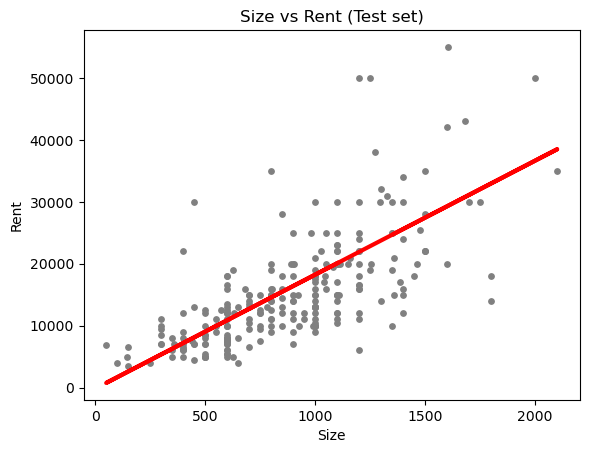

In [94]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Size vs Rent (Test set)')
plot_test.xlabel('Size')
plot_test.ylabel('Rent')
plot_test.show()

The regression line doesn't perfectly fit all our data points. We can notice there are so many values that are lying far away from the regression line.
However, loking at the slope, we can say there exists a positive relationship between the size and rent

In [95]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [96]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[18.39912894]]
Mean squared error:  41338259.42299939
R2 score:  0.4609948334168098


The MSE value is huge which tells that there are many datapoints outside the regression line.
Also, looking at the r square value, which is 46%. This means that the model is a a acceptable fit, however, looks like there are many other factors that contribute to the rental cost.

In [97]:
y_predicted

array([[20079.22330525],
       [10879.65883547],
       [12719.57172942],
       [20079.22330525],
       [11799.61528245],
       [16399.39751734],
       [14559.48462338],
       [ 9039.74594151],
       [26518.91843411],
       [21919.13619921],
       [24679.00554015],
       [15479.44107036],
       [12719.57172942],
       [ 2600.05081266],
       [20079.22330525],
       [10879.65883547],
       [29333.98516186],
       [ 5359.92015359],
       [10879.65883547],
       [18239.3104113 ],
       [13639.5281764 ],
       [20079.22330525],
       [13639.5281764 ],
       [18239.3104113 ],
       [24219.02731666],
       [12719.57172942],
       [17319.35396432],
       [18239.3104113 ],
       [13639.5281764 ],
       [16472.9940331 ],
       [ 7199.83304755],
       [12719.57172942],
       [ 9039.74594151],
       [ 9039.74594151],
       [20999.17975223],
       [26978.8966576 ],
       [18239.3104113 ],
       [16767.38009613],
       [ 8119.78949453],
       [17871.32783251],


In [105]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,14000,20079.223305
1,11000,10879.658835
2,14000,12719.571729
3,15000,20079.223305
4,13000,11799.615282
5,7000,16399.397517
6,9000,14559.484623
7,12500,9039.745942
8,18000,26518.918434
9,22000,21919.136199


While this does result in a decent-fitting model, this has a significant different between the actual and predicted values.

There exists a data collection bias. All the data entries are from a single website which doesnot represent a big population.
Also, the number of datapoints are not huge to develop a good training set.
Also, there could be multiple other factors determining the rent of the apartment, like furnishing status and the localities ofcourse.



##### Compare how the regression fits the training set

In [99]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [100]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [101]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[18.39912894]]
Mean squared error:  38777524.03561968
R2 score:  0.6244863716666005


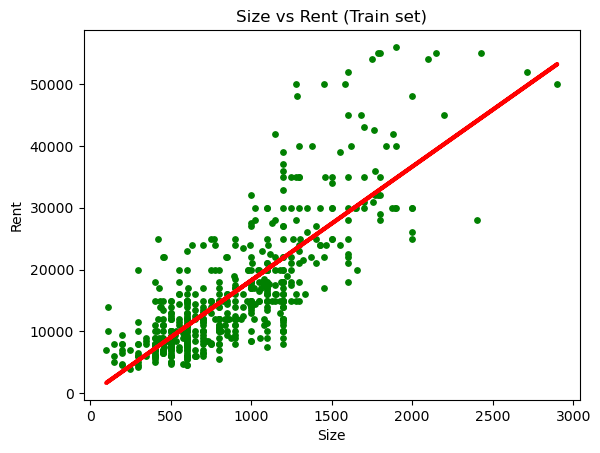

In [102]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Size vs Rent (Train set)')
plot_test.xlabel('Size')
plot_test.ylabel('Rent')
plot_test.show()

The regression line doesn't perfectly fit all our data points. We can notice there are so many values that are lying far away from the regression line.
However, loking at the slope, we can say there exists a positive relationship between the size and rent.


The MSE value is huge which tells that there are many datapoints outside the regression line.
Also, looking at the r square value, which is 62%. This means that the model is a a decent fit, however, looks like there are many other factors that contribute to the rental cost.